    isocode  year    rtfpna
0       USA  1950  0.617148
1       USA  1951  0.629588
2       USA  1952  0.638451
3       USA  1953  0.651858
4       USA  1954  0.646179
..      ...   ...       ...
181     MEX  2007  1.013673
182     MEX  2008  0.991548
183     MEX  2009  0.915879
184     MEX  2010  0.941604
185     MEX  2011  0.955766

[186 rows x 3 columns]
   isocode  year    rtfpna isocode.1  year.1  rtfpna.1 isocode.2  year.2  \
0      USA  1950  0.617148       CAN    1950  0.843335       MEX    1950   
1      USA  1951  0.629588       CAN    1951  0.855123       MEX    1951   
2      USA  1952  0.638451       CAN    1952  0.896489       MEX    1952   
3      USA  1953  0.651858       CAN    1953  0.910658       MEX    1953   
4      USA  1954  0.646179       CAN    1954  0.875178       MEX    1954   
..     ...   ...       ...       ...     ...       ...       ...     ...   
57     USA  2007  1.006595       CAN    2007  0.981433       MEX    2007   
58     USA  2008  0.998499      

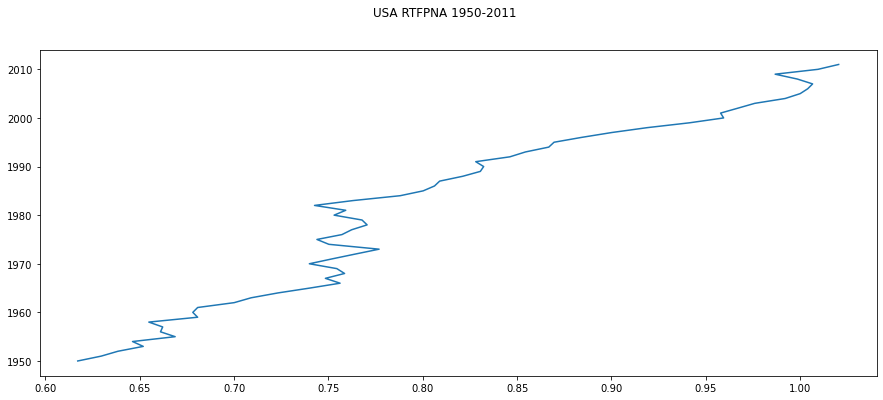

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import os

df1 = pd.read_csv("./TFP.csv")
df = pd.read_csv("./TFP2.csv")
print (df1)
print(df)
df = df.rename(columns={'isocode': 'Country', 'isocode.1':'Country.1', 'isocode.2':'Country.2'})
print(df)
x = df['year']
y = df['rtfpna']
year = np.arange(1950, 2012, 1)
#plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
#plt.axis([x,y])
#plt.show()
#data = np.genfromtxt("./FTPS3.csv", delimiter=",", names=["x", "y","z"])
plt.suptitle('USA RTFPNA 1950-2011')
plt.plot(df['rtfpna'], year)

In [ ]:
plt.suptitle('CAN RTFPNA 1950-2011')
plt.plot(df['rtfpna.1'], year, 'bo')


In [ ]:
plt.suptitle('MEX RTFPNA 1950-2011')
plt.plot(df['rtfpna.2'], year)


In [ ]:
plt.plot(year, df['rtfpna'], 'r--', year, df['rtfpna.1'], 'bs', year, df['rtfpna.2'], 'g^')
plt.suptitle('RTFPNA USA-CAN-MEX [1950-2011]')
plt.show()
# the overall RTFPNA shows a dependent behavior between countries.

In [3]:

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

data = pd.read_csv('./TFP5.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)


      year    rtfpna
0  1950-01  0.617148
1  1951-01  0.629588
2  1952-01  0.638451
3  1953-01  0.651858
4  1954-01  0.646179

 Data Types:
year       object
rtfpna    float64
dtype: object


In [4]:
# need to switch dtype object to datetime

from datetime import datetime
con=data['year']
data['year']=pd.to_datetime(data['year'])
data.set_index('year', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01', '1960-01-01', '1961-01-01',
               '1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
      

In [5]:
#convert to time series:
ts = data['rtfpna']
ts.head(10)

year
1950-01-01    0.617148
1951-01-01    0.629588
1952-01-01    0.638451
1953-01-01    0.651858
1954-01-01    0.646179
1955-01-01    0.668773
1956-01-01    0.661000
1957-01-01    0.662165
1958-01-01    0.654813
1959-01-01    0.680680
Name: rtfpna, dtype: float64

In [ ]:
#checking indexes
ts['1968-01-01']

In [ ]:
#checking data
print(ts)

In [ ]:
plt.plot(ts)

#graph yearxrtfpna 1950-2011 USA

In [ ]:
#analysing data behavior

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
test_stationarity(ts)

In [ ]:
#This is not stationary because :
 #mean is increasing even though the std is small.
 #Test stat is > critical value.
 #Note: the signed values are compared and the absolute values.
ts_log = np.log(ts)
plt.plot(ts_log)

In [ ]:
moving_avg = pd.Series(ts).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

In [ ]:
#NaN values found
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

In [ ]:
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
expwighted_avg = ts.ewm(halflife=1).mean()


In [ ]:
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [ ]:
ts_log_diff= ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_log_diff, lags =20)
plot_pacf(ts_log_diff, lags =20)

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
#AR model:
model = ARIMA(ts_log, order=(12,2,0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('AR model') 


In [ ]:
#MA model:
model = ARIMA(ts_log, order=(0,2,2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('MA model')

In [ ]:
#ARIMA model:
model = ARIMA(ts_log, order=(2,2,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('ARIMA model')

In [ ]:
predictions_AR_diff = pd.Series(results_AR.fittedvalues)
print (predictions_AR_diff.head())

In [ ]:
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print (predictions_AR_diff_cumsum.head())

In [ ]:
predictions_AR_log= pd.Series(index=ts_log.index)
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum,fill_value=0)
predictions_AR_log.head()

In [ ]:
predictions_AR = np.exp(predictions_AR_log)

In [ ]:
plt.plot(predictions_AR, 'green')
plt.plot(ts)

In [ ]:
# autoregression model seems to mirror the behavior of the curve, suffice to say it is close enough.

predicted=0.972135, expected=0.957825
predicted=0.966548, expected=0.966917
predicted=0.981168, expected=0.975910
predicted=0.990264, expected=0.992058
predicted=1.007011, expected=1.000000
predicted=1.010965, expected=1.004000
predicted=1.016354, expected=1.006595
predicted=1.016249, expected=0.998499
predicted=1.010456, expected=0.986738
predicted=0.998112, expected=1.009463
predicted=1.027295, expected=1.020392
Test RMSE: 0.012


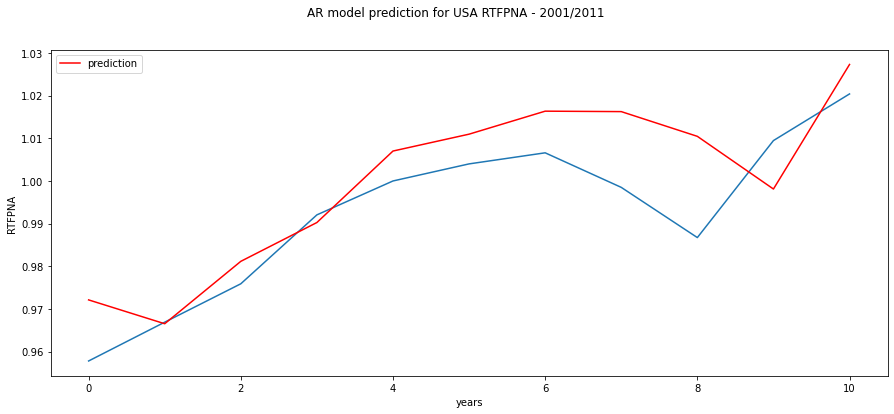

In [9]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('./TFP5.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-11], X[len(X)-11:]
# train autoregression
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, label='prediction', color='red')
plt.suptitle('AR model prediction for USA RTFPNA - 2001/2011')
plt.xlabel('years')
plt.ylabel('RTFPNA')
plt.legend()
pyplot.show()

predicted=1.066618, expected=1.050354
predicted=1.036112, expected=1.039474
predicted=1.037020, expected=1.016517
predicted=1.010594, expected=1.008693
predicted=1.007134, expected=1.000000
predicted=0.998304, expected=0.995132
predicted=0.996129, expected=0.981433
predicted=0.978845, expected=0.958357
predicted=0.963665, expected=0.926482
predicted=0.927817, expected=0.932567
predicted=0.955961, expected=0.929405
Test RMSE: 0.054


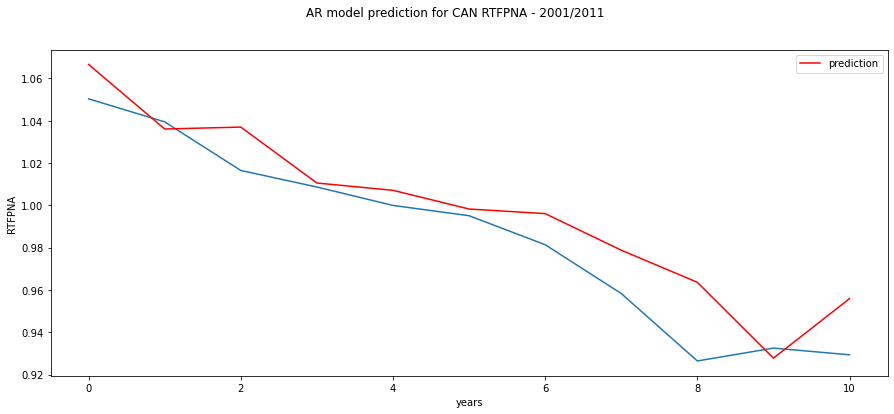

In [10]:
# load dataset
series = read_csv('./TFP6.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test1 = X[1:len(X)-11], X[len(X)-11:]
# train autoregression
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions1 = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test1[t]
	predictions1.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions1))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test1)
pyplot.plot(predictions1, label='prediction', color='red')
plt.suptitle('AR model prediction for CAN RTFPNA - 2001/2011')
plt.xlabel('years')
plt.ylabel('RTFPNA')
plt.legend()
pyplot.show()

predicted=1.065360, expected=1.036735
predicted=1.041170, expected=1.005033
predicted=1.004377, expected=0.991272
predicted=0.994749, expected=0.994963
predicted=1.012080, expected=1.000000
predicted=1.030992, expected=1.011751
predicted=1.024334, expected=1.013673
predicted=1.030542, expected=0.991548
predicted=1.002846, expected=0.915879
predicted=0.912721, expected=0.941604
predicted=0.960073, expected=0.955766
Test RMSE: 0.034


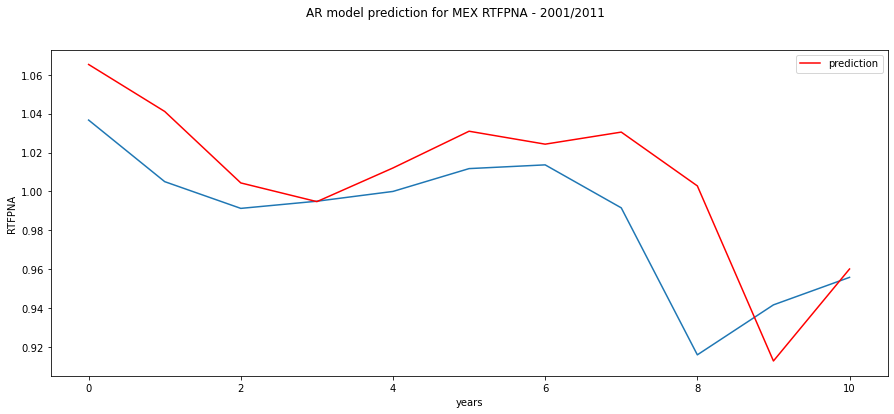

In [11]:
# load dataset
series = read_csv('./TFP7.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-11], X[len(X)-11:]
# train autoregression
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions2 = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions2.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions2))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions2, label='prediction', color='red')
plt.suptitle('AR model prediction for MEX RTFPNA - 2001/2011')
plt.xlabel('years')
plt.ylabel('RTFPNA')
plt.legend()
pyplot.show()

In [ ]:
plt.suptitle('AR model prediction for USA/CAN/MEX RTFPNA - 2001/2011')
pyplot.plot(predictions,label='prediction USA', color='red')
pyplot.plot(predictions1,label='prediction CAN', color='green')
pyplot.plot(predictions2,label='prediction MEX', color='yellow')
plt.legend()
plt.xlabel('years')
plt.ylabel('RTFPNA')

In [ ]:
from IPython.display import Image
Image('rtfpna.png')

#Accordding to, Young Eun Kim and Norman V. Loayza (WorldBank May 2019), the RTFPNA holds the equation:


In [ ]:
# Therefore having the data regarding: capital sotck, real GDP, EMP and other factors quoted above. 
# Would be interesting for creating better predictive models. 
# So considering the values predictated using the AR model, the forecast to 2021 are shown below. 
# *********************************************
# The Values in blue are also predictions from the AR model trained, they do not represent the actual values given.
# For the actual values check the graphs above. ******************************
Image('MEX.jpg')

In [ ]:
Image('CAN.jpg')

In [ ]:
Image('USA.jpg')

In [ ]:
## References:
## Jason Brownlee, AutoRegression Model for timeseries 
## Jacob Stallone, Time_Series_ARIMA (*available on github)
## Young Eun Kim Norman V. Loayza, Productivity Growth Patterns and Determinants across the World 